In [0]:
# http://cocodrips.hateblo.jp/entry/2017/07/30/185430

In [0]:
import pandas as pd

In [9]:
from google.colab import files
uploaded = files.upload()

Saving pandas.csv to pandas (1).csv


In [22]:
import io
data = pd.read_csv(io.StringIO(uploaded['pandas.csv'].decode('utf-8')))
data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,1,male,80.0,30.0000,S
1,1,2,female,4.0,39.0000,S
2,0,2,female,24.0,13.0000,S
3,0,2,male,37.0,26.0000,S
4,0,3,female,11.0,31.2750,S
5,1,3,female,13.0,7.2292,C
6,0,3,male,22.0,7.2500,S


In [11]:
data.shape

(7, 6)

In [12]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [13]:
data['Age']

0    80.0
1     4.0
2    24.0
3    37.0
4    11.0
5    13.0
6    22.0
Name: Age, dtype: float64

In [15]:
data[['Age', 'Sex']]

,Age,Sex
0,80.0,male
1,4.0,female
2,24.0,female
3,37.0,male
4,11.0,female
5,13.0,female
6,22.0,male


In [0]:
# DataFrame.query !!

In [17]:
data.query('Age > 20')

,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,1,male,80.0,30.00,S
2,0,2,female,24.0,13.00,S
3,0,2,male,37.0,26.00,S
6,0,3,male,22.0,7.25,S


In [19]:
data.query('(Age > 20) & (Sex == "female")')

,Survived,Pclass,Sex,Age,Fare,Embarked
2,0,2,female,24.0,13.0,S


In [24]:
# Resample
data[data['Age'] > 20]

,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,1,male,80.0,30.00,S
2,0,2,female,24.0,13.00,S
3,0,2,male,37.0,26.00,S
6,0,3,male,22.0,7.25,S


In [25]:
# Get Row (loc / iloc / ix)
data.loc[0:2]

,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,1,male,80.0,30.0,S
1,1,2,female,4.0,39.0,S
2,0,2,female,24.0,13.0,S


In [0]:
# DataFrame.groupby !!

In [28]:
data.groupby(['Survived']).mean()

,Pclass,Age,Fare
Survived,,,
0,2.5,23.500000,19.381250
1,2.0,32.333333,25.409733


In [30]:
data.groupby(['Survived']).std()

,Pclass,Age,Fare
Survived,,,
0,0.57735,10.661457,11.152828
1,1.00000,41.525093,16.375251


In [31]:
data.groupby(['Survived']).var()

,Pclass,Age,Fare
Survived,,,
0,0.333333,113.666667,124.385573
1,1.000000,1724.333333,268.148844


In [32]:
data.groupby(['Survived']).describe()

Age                                                        Fare  \
         count       mean        std   min    25%   50%    75%   max count   
Survived                                                                     
0          4.0  23.500000  10.661457  11.0  19.25  23.0  27.25  37.0   4.0   
1          3.0  32.333333  41.525093   4.0   8.50  13.0  46.50  80.0   3.0   

                    ...                    Pclass                          \
               mean ...        75%     max  count mean      std  min  25%   
Survived            ...                                                     
0         19.381250 ...   27.31875  31.275    4.0  2.5  0.57735  2.0  2.0   
1         25.409733 ...   34.50000  39.000    3.0  2.0  1.00000  1.0  1.5   

                         
          50%  75%  max  
Survived                 
0         2.5  3.0  3.0  
1         2.0  2.5  3.0  

[2 rows x 24 columns]

In [33]:
data.assign(One = 1)

,Survived,Pclass,Sex,Age,Fare,Embarked,One
0,1,1,male,80.0,30.0000,S,1
1,1,2,female,4.0,39.0000,S,1
2,0,2,female,24.0,13.0000,S,1
3,0,2,male,37.0,26.0000,S,1
4,0,3,female,11.0,31.2750,S,1
5,1,3,female,13.0,7.2292,C,1
6,0,3,male,22.0,7.2500,S,1


In [35]:
data.assign(
    IsChild = data['Age'] < 20
)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsChild
0,1,1,male,80.0,30.0000,S,False
1,1,2,female,4.0,39.0000,S,True
2,0,2,female,24.0,13.0000,S,False
3,0,2,male,37.0,26.0000,S,False
4,0,3,female,11.0,31.2750,S,True
5,1,3,female,13.0,7.2292,C,True
6,0,3,male,22.0,7.2500,S,False


In [36]:
data.assign(
    IsChild = (data['Age'] < 20).astype(int)
)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsChild
0,1,1,male,80.0,30.0000,S,0
1,1,2,female,4.0,39.0000,S,1
2,0,2,female,24.0,13.0000,S,0
3,0,2,male,37.0,26.0000,S,0
4,0,3,female,11.0,31.2750,S,1
5,1,3,female,13.0,7.2292,C,1
6,0,3,male,22.0,7.2500,S,0


In [41]:
# add lambda row
data.assign(
    X=data.apply(lambda x: x['Pclass'] + x['Survived'], axis=1)
)

,Survived,Pclass,Sex,Age,Fare,Embarked,X
0,1,1,male,80.0,30.0000,S,2
1,1,2,female,4.0,39.0000,S,3
2,0,2,female,24.0,13.0000,S,2
3,0,2,male,37.0,26.0000,S,2
4,0,3,female,11.0,31.2750,S,3
5,1,3,female,13.0,7.2292,C,4
6,0,3,male,22.0,7.2500,S,3


In [44]:
# add row こっちの方が列計算のため早い
data.assign(
    X=data['Pclass'] + data['Survived']
)

,Survived,Pclass,Sex,Age,Fare,Embarked,X
0,1,1,male,80.0,30.0000,S,2
1,1,2,female,4.0,39.0000,S,3
2,0,2,female,24.0,13.0000,S,2
3,0,2,male,37.0,26.0000,S,2
4,0,3,female,11.0,31.2750,S,3
5,1,3,female,13.0,7.2292,C,4
6,0,3,male,22.0,7.2500,S,3


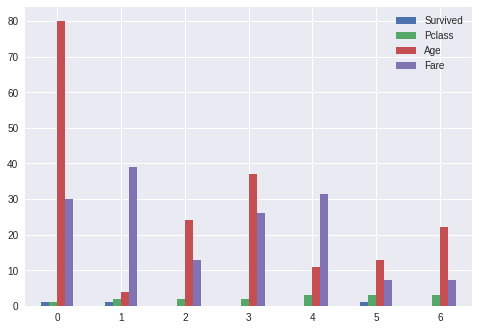

In [49]:
data.plot.bar(rot=0)

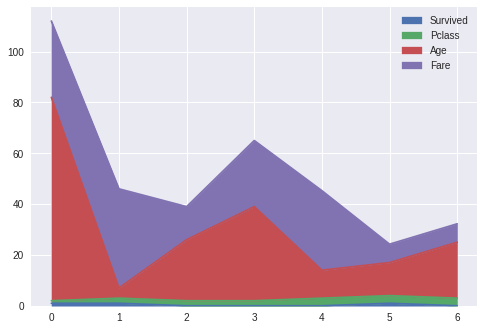

In [61]:
data.plot.area()

In [0]:
# Timescale 
#  (\(\ (\  /) /) /)
#  ('ㅅ'( 'ㅅ' )'ㅅ')
#  (\ (\(\  /) /) /)
#  ('ㅅ'( 'ㅅ' )'ㅅ')
#  (\ (\(\  /) /) /)
#  ('ㅅ'( 'ㅅ' )'ㅅ')
#  (\ (\(\  /) /) /)
#  ('ㅅ'( 'ㅅ' )'ㅅ')
#  (\ (\(\  /) /) /)
#  ('ㅅ'( 'ㅅ' )'ㅅ')

In [0]:
# 　 　　　 　　　　　　　　　　　　  (\  /)
# 　　 　　 　　　　　　　　　　　　 ( ‘ㅅ’ )
#  　  　 　　　　(\ (\  (\  /)　 /) /)
# 　  　 　　　　 (‘ㅅ’ ( ’ㅅ’ ) ‘ㅅ’)
# (\ (\ 　(\ (\  (\   /)　 /) /)　 /) /)
# (‘ㅅ’ (’ㅅ’  ( ‘ㅅ’ ) ’ㅅ’) ‘ㅅ’)

In [0]:
#https://note.nkmk.me/python-pandas-time-series-multiindex/

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving pandas_timescale.csv to pandas_timescale.csv


In [3]:
import io
date_df = pd.read_csv(io.StringIO(uploaded['pandas_timescale.csv'].decode('utf-8')))
date_df

,date,val_1,val_2
0,2017-11-01,65,76
1,2017-11-07,26,66
2,2017-11-18,47,47
3,2017-11-27,20,38
4,2017-12-05,65,85
5,2017-12-12,4,29
6,2017-12-22,31,54
7,2017-12-29,21,8
8,2018-01-03,98,76
9,2018-01-08,48,64


In [7]:
#df = pd.read_csv(io.StringIO(uploaded['pandas_timescale.csv'].decode('utf-8')), parse_dates=[0], index_col=[0])
df = pd.read_csv(io.StringIO(uploaded['pandas_timescale.csv'].decode('utf-8')), parse_dates=[0])
df

,date,val_1,val_2
0,2017-11-01,65,76
1,2017-11-07,26,66
2,2017-11-18,47,47
3,2017-11-27,20,38
4,2017-12-05,65,85
5,2017-12-12,4,29
6,2017-12-22,31,54
7,2017-12-29,21,8
8,2018-01-03,98,76
9,2018-01-08,48,64
